<a href="https://colab.research.google.com/github/MelsonHeo00/Summer_MicroCredential/blob/main/Final_Project_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Identify the Problem

In this analysis, we will be looking at Apple Stocks as Apple is known to be one of the most well known tech companies in the world. We want to predict the prices between before the pandemic and during the pandemic. The pandemic has caused some companies to lose out due to the in-person restrictions that the government implemented. While other companies that did not require any in-person restrictions did benefit during the pandemic. As Apple is a tech company, Apple has benefitted during the pandemic. The question remains though, how much did Apple benefit during the pandemic? In this notebook, we will be going over how much was Apple stocks fluctuated during the course of 5 years.

# Section 2: EDA/Data Handling

### Part 1: Cleaning Out Data

The data that we are using is based on 2017 to 2022 on a daily basis (Weekdays only, stocks markets are open only weekdays). In this section, we want to load the data and check out the data. If there is any data that contains objects or null values, the data must be cleaned to do some data analysis.

Data: https://finance.yahoo.com/quote/AAPL/

In [66]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
# Loading up the data
stocksdf = pd.read_csv('https://raw.githubusercontent.com/MelsonHeo00/ML-Data/main/AAPL%20(1).csv')

In [68]:
stocksdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-21,39.375000,39.472500,38.777500,39.302502,37.300640,105474000
1,2017-08-22,39.557499,40.000000,39.505001,39.945000,37.910427,86418400
2,2017-08-23,39.767502,40.117500,39.720001,39.994999,37.957867,77596400
3,2017-08-24,40.107498,40.185001,39.637501,39.817501,37.789406,79275600
4,2017-08-25,39.912498,40.139999,39.817501,39.965000,37.929394,101920400


In [69]:
stocksdf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2022-08-15,171.520004,173.389999,171.350006,173.190002,173.190002,54091700
1255,2022-08-16,172.779999,173.710007,171.660004,173.029999,173.029999,56377100
1256,2022-08-17,172.770004,176.149994,172.570007,174.550003,174.550003,79542000
1257,2022-08-18,173.750000,174.899994,173.119995,174.149994,174.149994,62290100
1258,2022-08-19,173.029999,173.740005,171.309998,171.520004,171.520004,70211500


In [70]:
stocksdf.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [71]:
stocksdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [72]:
stocksdf.dropna()
# Drops all of the null values

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-21,39.375000,39.472500,38.777500,39.302502,37.300640,105474000
1,2017-08-22,39.557499,40.000000,39.505001,39.945000,37.910427,86418400
2,2017-08-23,39.767502,40.117500,39.720001,39.994999,37.957867,77596400
3,2017-08-24,40.107498,40.185001,39.637501,39.817501,37.789406,79275600
4,2017-08-25,39.912498,40.139999,39.817501,39.965000,37.929394,101920400
...,...,...,...,...,...,...,...
1254,2022-08-15,171.520004,173.389999,171.350006,173.190002,173.190002,54091700
1255,2022-08-16,172.779999,173.710007,171.660004,173.029999,173.029999,56377100
1256,2022-08-17,172.770004,176.149994,172.570007,174.550003,174.550003,79542000
1257,2022-08-18,173.750000,174.899994,173.119995,174.149994,174.149994,62290100


In [73]:
stocksdf.isnull().sum()
# To check if there are any null values just in case

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

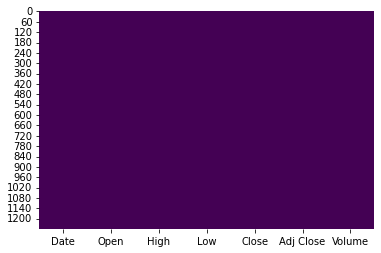

In [74]:
sns.heatmap(stocksdf.isnull(), cbar = False, cmap = 'viridis')
# Checks if any data is empty

In [75]:
stocksdf.isnull().value_counts()

Date   Open   High   Low    Close  Adj Close  Volume
False  False  False  False  False  False      False     1259
dtype: int64

As we can see within the data so far, there are no null values. There are some data cleaning that must be performed. Volume and Adj Close will not be needed for this analysis. Adj Close is very similar to close so we would only need one of the Close columns.

In [76]:
stocksdf = stocksdf.drop(['Volume', 'Adj Close'], axis = 1)
# Dropping the volume and adj close

In [77]:
stocksdf.head()
# Showing that the volume and adj close column was dropped

,Date,Open,High,Low,Close
0,2017-08-21,39.375000,39.472500,38.777500,39.302502
1,2017-08-22,39.557499,40.000000,39.505001,39.945000
2,2017-08-23,39.767502,40.117500,39.720001,39.994999
3,2017-08-24,40.107498,40.185001,39.637501,39.817501
4,2017-08-25,39.912498,40.139999,39.817501,39.965000


## Part 2: Creating A Comparison

In this part, I will be making a new column. This column will indicate a daily record whether or not the stocks increase. We will be using this to compare how many times stocks increase over the course of the pandemic.

In [78]:
stocks_increase = []
previous_stocks = 0

for index, row in stocksdf.iterrows():
  current_stocks = row['Close'] 
  total_increase = current_stocks - previous_stocks
  previous_stocks = current_stocks
  stocks_increase.append(total_increase)

# In this section, I used close as a reference for each stock price as close means that the stock market closed out for the day.
# With this, I used the current stock meaning the current day subracting the previous day to show if there was an increase during the stock market

In [79]:
stocksdf['stocks_increase'] = stocks_increase

In [80]:
stocksdf

,Date,Open,High,Low,Close,stocks_increase
0,2017-08-21,39.375000,39.472500,38.777500,39.302502,39.302502
1,2017-08-22,39.557499,40.000000,39.505001,39.945000,0.642498
2,2017-08-23,39.767502,40.117500,39.720001,39.994999,0.049999
3,2017-08-24,40.107498,40.185001,39.637501,39.817501,-0.177498
4,2017-08-25,39.912498,40.139999,39.817501,39.965000,0.147499
...,...,...,...,...,...,...
1254,2022-08-15,171.520004,173.389999,171.350006,173.190002,1.089996
1255,2022-08-16,172.779999,173.710007,171.660004,173.029999,-0.160003
1256,2022-08-17,172.770004,176.149994,172.570007,174.550003,1.520004
1257,2022-08-18,173.750000,174.899994,173.119995,174.149994,-0.400009


Note: I had to delete the first row because the stocks_increase was at 39 which was not correct. 

In [81]:
stocksdf = stocksdf.drop(labels=0, axis=0)

In [82]:
stocksdf

,Date,Open,High,Low,Close,stocks_increase
1,2017-08-22,39.557499,40.000000,39.505001,39.945000,0.642498
2,2017-08-23,39.767502,40.117500,39.720001,39.994999,0.049999
3,2017-08-24,40.107498,40.185001,39.637501,39.817501,-0.177498
4,2017-08-25,39.912498,40.139999,39.817501,39.965000,0.147499
5,2017-08-28,40.035000,40.500000,39.982498,40.367500,0.402500
...,...,...,...,...,...,...
1254,2022-08-15,171.520004,173.389999,171.350006,173.190002,1.089996
1255,2022-08-16,172.779999,173.710007,171.660004,173.029999,-0.160003
1256,2022-08-17,172.770004,176.149994,172.570007,174.550003,1.520004
1257,2022-08-18,173.750000,174.899994,173.119995,174.149994,-0.400009


In this part, I will be filtering out the data based on before the pandemic and during the pandemic. As you will see in section 3, I will be using these two data frames to help visual the data better between the two time periods.

In [83]:
beforedf  = stocksdf[stocksdf['Date'] < '2020-03-01']
duringdf  = stocksdf[stocksdf['Date'] > '2020-03-01']

In [84]:
beforedf['stocks_increase'].sum()

29.037494000000002

In [85]:
duringdf['stocks_increase'].sum()

103.180008

In this little section, before I filter out the data, I want to filter a seperate data for section 4. As you will see in section 4, I used these two data frame instead to help visual predict the data. First, I filtered the data based on stocks getting increased and then seperated the data to two data frames.

In [86]:
stocksdf

,Date,Open,High,Low,Close,stocks_increase
1,2017-08-22,39.557499,40.000000,39.505001,39.945000,0.642498
2,2017-08-23,39.767502,40.117500,39.720001,39.994999,0.049999
3,2017-08-24,40.107498,40.185001,39.637501,39.817501,-0.177498
4,2017-08-25,39.912498,40.139999,39.817501,39.965000,0.147499
5,2017-08-28,40.035000,40.500000,39.982498,40.367500,0.402500
...,...,...,...,...,...,...
1254,2022-08-15,171.520004,173.389999,171.350006,173.190002,1.089996
1255,2022-08-16,172.779999,173.710007,171.660004,173.029999,-0.160003
1256,2022-08-17,172.770004,176.149994,172.570007,174.550003,1.520004
1257,2022-08-18,173.750000,174.899994,173.119995,174.149994,-0.400009


In [87]:
stocksdf.head()
# This part is to check if the code is still being run properly

,Date,Open,High,Low,Close,stocks_increase
1,2017-08-22,39.557499,40.000000,39.505001,39.945000,0.642498
2,2017-08-23,39.767502,40.117500,39.720001,39.994999,0.049999
3,2017-08-24,40.107498,40.185001,39.637501,39.817501,-0.177498
4,2017-08-25,39.912498,40.139999,39.817501,39.965000,0.147499
5,2017-08-28,40.035000,40.500000,39.982498,40.367500,0.402500


In [88]:
stocksdf['stocks_increase'] = stocksdf['stocks_increase'].mask(stocksdf['stocks_increase'] < 0 , 0)
stocksdf['stocks_increase'] = stocksdf['stocks_increase'].mask(stocksdf['stocks_increase'] > 0 , 1)

In [89]:
stocksdf['stocks_increase'] = stocksdf['stocks_increase'].astype(int) # To convert from float to int

beforepandemicdf = stocksdf[stocksdf['Date'] < '2020-03-01']
pandemicdf = stocksdf[stocksdf['Date'] > '2020-03-01']

# Filtering between before the pandemic and after the pandemic

In [90]:
beforepandemicdf.head()

,Date,Open,High,Low,Close,stocks_increase
1,2017-08-22,39.557499,40.000000,39.505001,39.945000,1
2,2017-08-23,39.767502,40.117500,39.720001,39.994999,1
3,2017-08-24,40.107498,40.185001,39.637501,39.817501,0
4,2017-08-25,39.912498,40.139999,39.817501,39.965000,1
5,2017-08-28,40.035000,40.500000,39.982498,40.367500,1


In [91]:
beforepandemicdf.tail()

,Date,Open,High,Low,Close,stocks_increase
630,2020-02-24,74.315002,76.044998,72.307503,74.544998,0
631,2020-02-25,75.237503,75.632500,71.532501,72.019997,0
632,2020-02-26,71.632500,74.470001,71.625000,73.162498,1
633,2020-02-27,70.275002,71.500000,68.239998,68.379997,0
634,2020-02-28,64.315002,69.602501,64.092499,68.339996,0


In [92]:
pandemicdf.head()

,Date,Open,High,Low,Close,stocks_increase
635,2020-03-02,70.570000,75.360001,69.430000,74.702499,1
636,2020-03-03,75.917503,76.000000,71.449997,72.330002,0
637,2020-03-04,74.110001,75.849998,73.282501,75.684998,1
638,2020-03-05,73.879997,74.887497,72.852501,73.230003,0
639,2020-03-06,70.500000,72.705002,70.307503,72.257500,0


In [93]:
pandemicdf.tail()

,Date,Open,High,Low,Close,stocks_increase
1254,2022-08-15,171.520004,173.389999,171.350006,173.190002,1
1255,2022-08-16,172.779999,173.710007,171.660004,173.029999,0
1256,2022-08-17,172.770004,176.149994,172.570007,174.550003,1
1257,2022-08-18,173.750000,174.899994,173.119995,174.149994,0
1258,2022-08-19,173.029999,173.740005,171.309998,171.520004,0


Now we got two dataframes to work with. We will be using this to compare how the pandemic affected the APPL stocks

# Section 3: Data Visualization

In this section, we will examining the relationship between all of the prices and the date, showing a daily rise or fall.
Note: For the first two graphs, I found it online but I thought it was pretty cool to show how the stock prices were over the coruse of 5 years

In [94]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig2 = make_subplots(specs = [[{"secondary_y": True}]])
fig2.add_trace(go.Bar(x = stocksdf['Date'],y = stocksdf['Open'],name = 'Opening Price'), secondary_y=True) 
fig2.add_trace(go.Bar(x = stocksdf['Date'],y = stocksdf['Close'],name = 'Closing Price'), secondary_y=True) 
fig2.update_layout(title_text = 'Daily Open and Close Prices for APPL (8/22/17 - 8/19/22)')
fig2.show()

In [95]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Bar(x = stocksdf['Date'],y = stocksdf['High'],name = 'High'), secondary_y = True) 
fig2.add_trace(go.Bar(x = stocksdf['Date'],y = stocksdf['Low'],name = 'Low'), secondary_y = True) 
fig2.update_layout(title_text = 'Daily High and Low Prices for APPL (8/22/17 - 8/19/22)')
fig2.show()

These two figures show that the open/close and high/low are pretty similar in pattern. By visualizing the data, we can see that the stock price when up during the beginning of the pandemic. In the next visualization, we want to see how often the stocks price when up before the pandemic and during the pandemic.

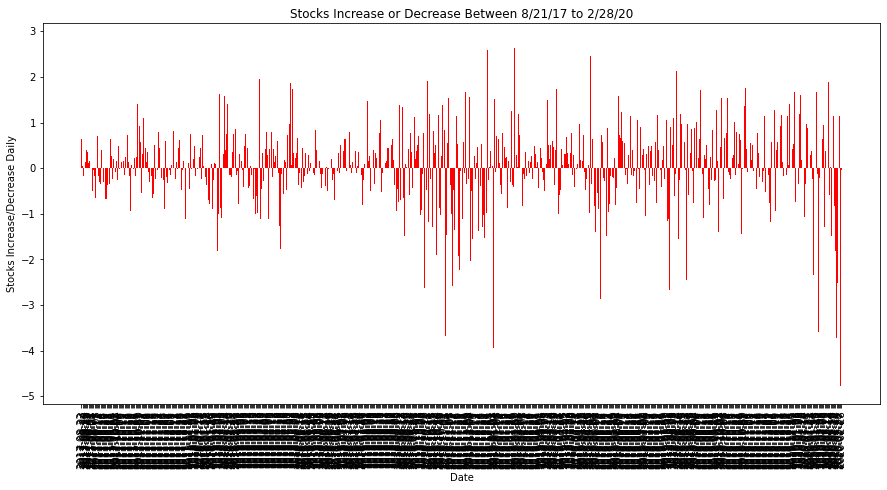

In [96]:
plt.figure(figsize=(15,7))
plt.bar(x = beforedf['Date'], height = beforedf['stocks_increase'], color = 'red')

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Stocks Increase/Decrease Daily')
plt.title('Stocks Increase or Decrease Between 8/21/17 to 2/28/20')
plt.show()

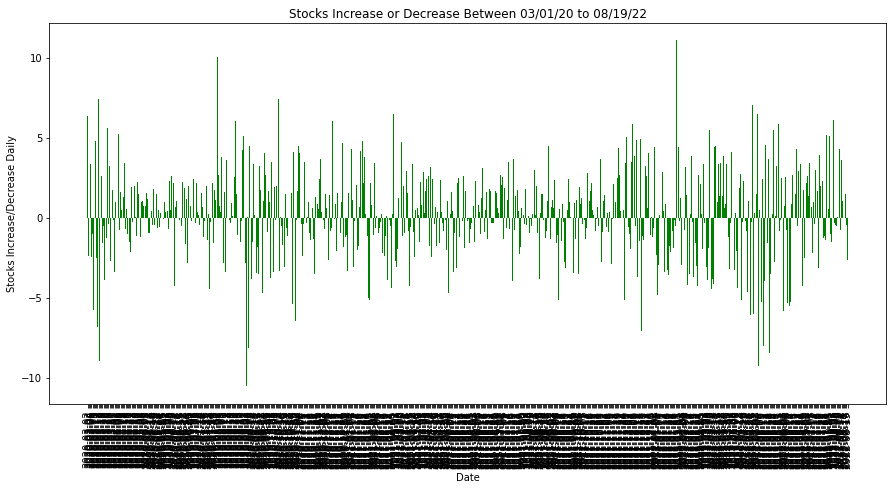

In [97]:
plt.figure(figsize=(15,7))
plt.bar(x = duringdf['Date'], height = duringdf['stocks_increase'], color='green')

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Stocks Increase/Decrease Daily')
plt.title('Stocks Increase or Decrease Between 03/01/20 to 08/19/22')
plt.show()

These two figures show how often the stock prices increased or decreased. Before the pandemic showed that the stocks did not have much of an increase during the pandemic. During the pandemic showed that the stocks did increase a lot during the pandemic espeically during the beginning of the pandemic.

# Section 4: Machine Learning Algorithms


In this section, we will be using 3-5 data splits per machine learning algorithm to see whether increase or decrease of the accuracy of the model. We will be predicting how closely the close prices will affect the stock increase before the pandemic and during the pandemic. For the algorithms, we tested out 4 of them: Logistic regression, Knn, Decision Tree, and Random Forest.

### Part 1: Before the pandemic

In this analysis, we will be discovering if we can predict the stocks increase based on closing prices alone before the pandemic.

#### Logistic Regression

In [98]:
X = beforepandemicdf['Close'].values.reshape(-1, 1)
y = beforepandemicdf['stocks_increase'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 10)

In [99]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)
predictions = classifier.predict(X_test)

In [100]:
print('The prediction accuracy of the model is ', classifier.score(X_test, y_test))
pp = classifier.predict(X_test)
print('Times It Increased: ', sum(pp!=0))
print('Times it Decreased: ', sum(pp==0))

The prediction accuracy of the model is  0.5299684542586751
Times It Increased:  317
Times it Decreased:  0


In [101]:
print(classification_report(y_test, predictions, zero_division = 1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       149
           1       0.53      1.00      0.69       168

    accuracy                           0.53       317
   macro avg       0.76      0.50      0.35       317
weighted avg       0.75      0.53      0.37       317



In [102]:
confusion_matrix(y_test, predictions)

array([[  0, 149],
       [  0, 168]])

#### Knn

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=1)

In [104]:
pred = knn.predict(X_test)

In [105]:
print(confusion_matrix(y_test, pred))

[[69 80]
 [75 93]]


In [106]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47       149
           1       0.54      0.55      0.55       168

    accuracy                           0.51       317
   macro avg       0.51      0.51      0.51       317
weighted avg       0.51      0.51      0.51       317



#### Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47       149
           1       0.53      0.55      0.54       168

    accuracy                           0.51       317
   macro avg       0.51      0.50      0.50       317
weighted avg       0.51      0.51      0.51       317



In [110]:
print(confusion_matrix(y_test, predictions))

[[68 81]
 [75 93]]


#### Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 600)
rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(n_estimators=600)

In [112]:
predictions_rfc = rf.predict(X_test)

In [113]:
print(classification_report(y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.48      0.45      0.46       149
           1       0.53      0.56      0.55       168

    accuracy                           0.51       317
   macro avg       0.50      0.50      0.50       317
weighted avg       0.51      0.51      0.51       317



In [114]:
print(confusion_matrix(y_test, predictions_rfc))

[[67 82]
 [74 94]]


### Part 2: During the pandemic

In this analysis, we will be discovering if we can predict the stocks increase based on closing prices alone during the pandemic.

#### Logistic Regression

In [115]:
X = pandemicdf['Close'].values.reshape(-1, 1)
y = pandemicdf['stocks_increase'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 10)

In [116]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)
predictions = classifier.predict(X_test)

In [117]:
print('The prediction accuracy of the model is ', classifier.score(X_test, y_test))
pp = classifier.predict(X_test)
print('Times It Increased: ', sum(pp != 0))
print('Times it Decreased: ', sum(pp == 0))

The prediction accuracy of the model is  0.5160256410256411
Times It Increased:  312
Times it Decreased:  0


In [118]:
print(classification_report(y_test, predictions, zero_division = 1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       151
           1       0.52      1.00      0.68       161

    accuracy                           0.52       312
   macro avg       0.76      0.50      0.34       312
weighted avg       0.75      0.52      0.35       312



In [119]:
confusion_matrix(y_test, predictions)

array([[  0, 151],
       [  0, 161]])

#### Knn

In [120]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=1)

In [121]:
pred = knn.predict(X_test)

In [122]:
print(confusion_matrix(y_test, pred))

[[71 80]
 [69 92]]


In [123]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.51      0.47      0.49       151
           1       0.53      0.57      0.55       161

    accuracy                           0.52       312
   macro avg       0.52      0.52      0.52       312
weighted avg       0.52      0.52      0.52       312



#### Decision Tree

In [124]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [125]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48       151
           1       0.53      0.56      0.54       161

    accuracy                           0.52       312
   macro avg       0.51      0.51      0.51       312
weighted avg       0.52      0.52      0.52       312



In [126]:
print(confusion_matrix(y_test, predictions))

[[71 80]
 [71 90]]


#### Random Forest

In [127]:
rf = RandomForestClassifier(n_estimators = 600)
rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(n_estimators=600)

In [128]:
predictions_rfc = rf.predict(X_test)

In [129]:
print(classification_report(y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.50      0.47      0.49       151
           1       0.53      0.57      0.55       161

    accuracy                           0.52       312
   macro avg       0.52      0.52      0.52       312
weighted avg       0.52      0.52      0.52       312



In [130]:
print(confusion_matrix(y_test, predictions_rfc))

[[71 80]
 [70 91]]


Overall with this section, all of these algorithms were similar before the pandemic and during the pandemic. All of the models had a 51 to 52 accuracy so they were all pretty close.

Note: I was not able to fix the logistic regression as it does not show any zeroes.

# Section 5: Conclusion

In this notebook, I was analyzing in how the APPL stocks did before the pandemic and during the pandemic. As shown from section 3, we can see that the APPL stocks were very volatile and increased by a lot during 2020 which was during the pandemic. While before the pandemic, the stocks were pretty stable and slowly incresed over the course of time. As shown from section 4, all of the models had a close accuracy for both before the pandemic and during the pandemic. We can see as APPL is one of the biggest tech companies which did benefit from the pandemic as people needed something to do in quarantine.